# Analysis Workflow #

#### Imports

In [2]:
import subprocess
import os
import pandas as pd
import numpy as np

from cobra import io
from jproperties import Properties
from mana import results_analysis

#### Java must be installed on your machine to run this notebook


c:\Users\louison.fresnais\AppData\Local\miniconda3\envs\cobrapy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load properties file

In [3]:
props = Properties()
try:
    with open('props.properties', 'rb') as config_file:
        props.load(config_file)
except FileNotFoundError as e:
    print(e)
    print("\033[91m\033[1m "+"You must provide a props.properties file"+" \033[0m\033[91m")

### Load required datasets

In [8]:
### Load the metadata file
pheno = pd.read_csv(props.get("pheno").data,sep="\t",index_col=0)
#path to input_data
input_path = props.get("working_path").data+"input_data/"

### Create analysis directory and subdirectories

In [7]:
if "analysis" not in os.listdir(str(props.get("working_path").data)):
    os.mkdir(str(props.get("working_path").data)+"analysis")
for subdir in ["analysis/dist_matrices","analysis/reaction_clusters","analysis/subnetwork_gmls","analysis/subnetwork_reactions"]:
    if subdir not in os.listdir(str(props.get("working_path").data)+"analysis"):
        os.mkdir(str(props.get("working_path").data)+subdir)

#### Compute the distance matrix for the differentially activated reactions

In [7]:
#Read a reaction list file
for file in os.listdir(props.get("working_path").data+"input_data/DARS/"):
    cmd = "java -cp met4j-toolbox-1.2.1-SNAPSHOT.jar"\
    + " fr.inrae.toulouse.metexplore.met4j_toolbox.networkAnalysis.ReactionDistanceMatrix"\
    + " -i "+input_path+"recon2v2_biomass_corrected.sbml"\
    + " -s "+input_path+"DARS/"+file\
    + " -o "+str(props.get("working_path").data)+"analysis/dist_matrices/"+'_'.join(file.split('_')[0:3])+'_extracellexclude.tsv'\
    + " -sc "+input_path+"recon22_scs_metex.txt"\
    + " -re "+input_path+"blocked_inactives_phh_exchange_exportextracell_reactions.txt" \
    + " -u &"
    print(cmd)
    #call ReactionDistanceMatrix Met4j app
    subprocess.run(cmd,capture_output=False,shell=True)
    

java -cp met4j-toolbox-1.2.1-SNAPSHOT.jar fr.inrae.toulouse.metexplore.met4j_toolbox.networkAnalysis.ReactionDistanceMatrix -i input_data/recon2v2_biomass_corrected.sbml -s input_data/reaction_list/.ipynb_checkpoints -o working_files/dist_matrices/.ipynb_checkpoints_extracellexclude.tsv -sc input_data/recon22_scs_metex.txt -re input_data/blocked_inactives_phh_exchange_exportextracell_reactions.txt -u &
java -cp met4j-toolbox-1.2.1-SNAPSHOT.jar fr.inrae.toulouse.metexplore.met4j_toolbox.networkAnalysis.ReactionDistanceMatrix -i input_data/recon2v2_biomass_corrected.sbml -s input_data/reaction_list/amiodarone_24h_high_noisesolvtime_corrected.txt -o working_files/dist_matrices/amiodarone_24h_high_extracellexclude.tsv -sc input_data/recon22_scs_metex.txt -re input_data/blocked_inactives_phh_exchange_exportextracell_reactions.txt -u &
java -cp met4j-toolbox-1.2.1-SNAPSHOT.jar fr.inrae.toulouse.metexplore.met4j_toolbox.networkAnalysis.ReactionDistanceMatrix -i input_data/recon2v2_biomass_cor

#### Plot the dendrogram and identify interesting clusters of reactions

/home/louison/anaconda3/envs/cobrapy/lib/python3.7/site-packages/ipykernel_launcher.py:54: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



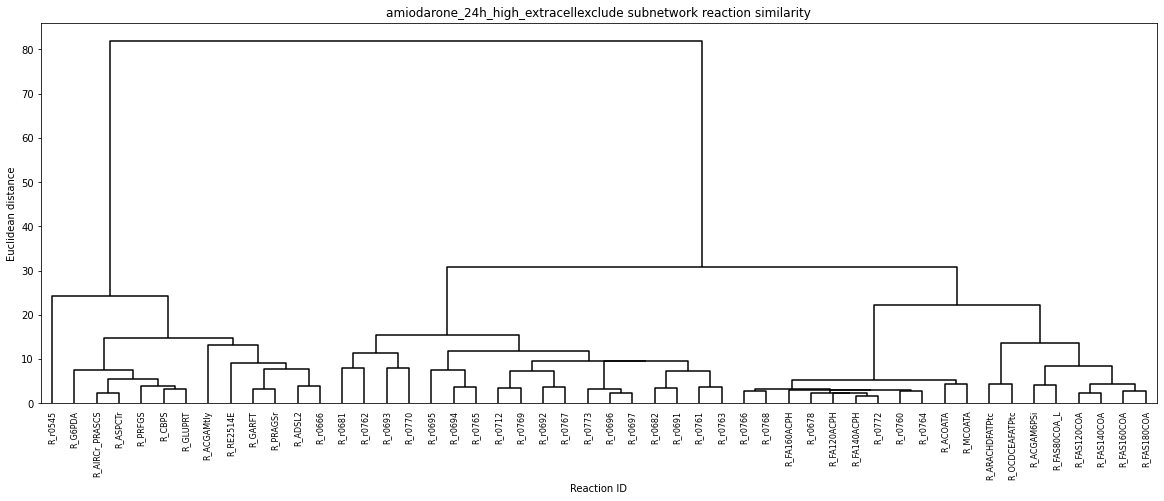

Enter the number of clusters to extract 2
[[0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['R_ACGAM6PSi', 'R_ACOATA', 'R_ARACHDFATPtc', 'R_FA120ACPH', 'R_FA140ACPH', 'R_FA160ACPH', 'R_FAS120COA', 'R_FAS140COA', 'R_FAS160COA', 'R_FAS180COA', 'R_FAS80COA_L', 'R_MCOATA', 'R_OCDCEAFATPtc', 'R_r0678', 'R_r0681', 'R_r0682', 'R_r0691', 'R_r0692', 'R_r0693', 'R_r0694', 'R_r0695', 'R_r0696', 'R_r0697', 'R_r0712', 'R_r0760', 'R_r0761', 'R_r0762', 'R_r0763', 'R_r0764', 'R_r0765', 'R_r0766', 'R_r0767', 'R_r0768', 'R_r0769', 'R_r0770', 'R_r0772', 'R_r0773']
['R_ACGAMtly', 'R_ADSL2', 'R_AIRCr_PRASCS', 'R_ASPCTr', 'R_CBPS', 'R_G6PDA', 'R_GARFT', 'R_GLUPRT', 'R_PRAGSr', 'R_PRFGS', 'R_RE2514E', 'R_r0545', 'R_r0666']


/home/louison/anaconda3/envs/cobrapy/lib/python3.7/site-packages/ipykernel_launcher.py:54: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



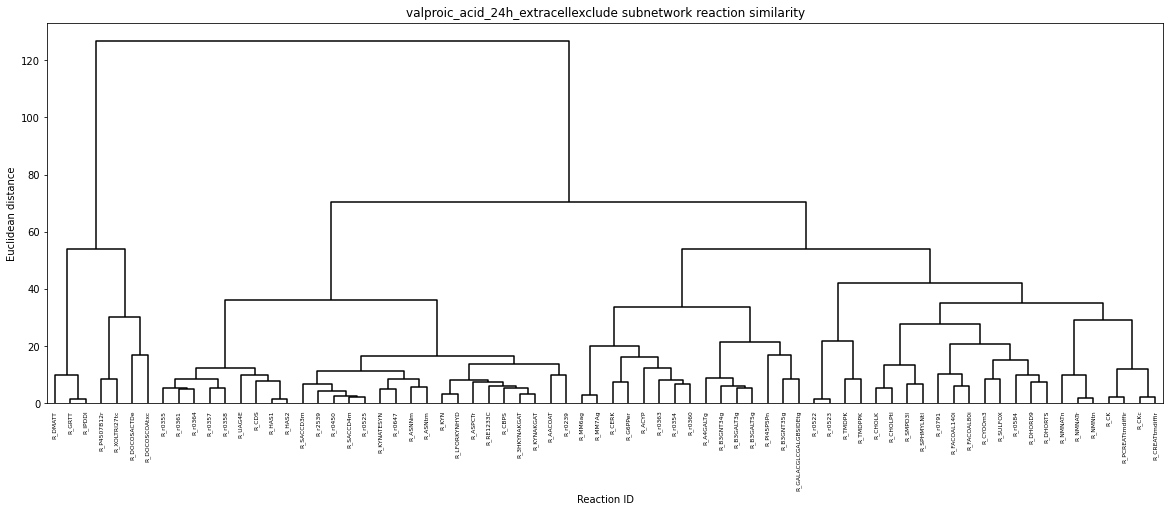

Enter the number of clusters to extract 3
[[0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 0 0 2 0 0 0
  0 1 1 1 1 1 2 1 1 0 0 0 1 1 1 1 1 0 2 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0]]
['R_3HKYNAKGAT', 'R_AACOAT', 'R_ASNNm', 'R_ASNtm', 'R_ASPCTr', 'R_CBPS', 'R_CDS', 'R_HAS1', 'R_HAS2', 'R_KYN', 'R_KYNAKGAT', 'R_KYNATESYN', 'R_LFORKYNHYD', 'R_RE1233C', 'R_SACCD3m', 'R_SACCD4m', 'R_UAG4E', 'R_r0239', 'R_r0355', 'R_r0357', 'R_r0358', 'R_r0361', 'R_r0364', 'R_r0450', 'R_r0525', 'R_r0647', 'R_r2539']
['R_A4GALTg', 'R_ACYP', 'R_B3GALT3g', 'R_B3GALT5g', 'R_B3GNT34g', 'R_B3GNT35g', 'R_CERK', 'R_CHOLK', 'R_CHOLPtl', 'R_CK', 'R_CKc', 'R_CREATtmdiffir', 'R_CYOOm3', 'R_DHORD9', 'R_DHORTS', 'R_FACOAL140i', 'R_FACOAL80i', 'R_G6PPer', 'R_GALACGLCGALGBSIDEtg', 'R_MM6ag', 'R_MM7Ag', 'R_NMNATn', 'R_NMNATr', 'R_NMNtn', 'R_PCREATtmdiffir', 'R_PI45P5Pn', 'R_SMPD3l', 'R_SPHMYLNtl', 'R_SULFOX', 'R_TMDPK', 'R_TMDPPK', 'R_r0354', 'R_r0360', 'R_r0363', 'R_r0522', 'R_r0523', 'R_r0584', 'R_r0791']
['R_DMAT

In [22]:
### Read computed distances matrices
for mat in os.listdir(str(props.get("working_path").data)+"analysis/dist_matrices/"):
    prefix = mat.replace('.tsv','')+'_cluster_'
    title = mat.split('/')[-1].replace('.csv','')+" subnetwork reaction similarity"
    matrix = pd.read_csv(str(props.get("working_path").data)+"analysis/dist_matrices/"+mat,sep=',',index_col='id')
    #remove disconnected reactions
    matrix = matrix[~matrix.isin([np.nan, np.inf, -np.inf])]
    #thresh is the number of NA in row/col in order to remove this row/col
    matrix.dropna(inplace=True,axis=0,thresh=matrix.shape[0]*0.7)
    matrix.dropna(inplace=True,axis=1,thresh=matrix.shape[0]*0.7)
    results_analysis.extract_reactions_from_clusters(matrix,title=title,write_files=True,file_name=str(props.get("working_path").data)+"analysis/reaction_clusters/"+mat.replace('.csv','')+'_cluster',header=True)

In [24]:
#Generate an annotation table for each cluster
#load model
#dict compartments id to compartments names
comp = {"c":"Cytoplasm","m":"Mitochondrion","x":"Peroxisome","l":"Lysosome","g":"Golgi appartus","e":"Extracellular space","r":"Endoplasic reticulum","n":"Nucleus","i":"Mitochondrial intermembrane space"}
recon_model = io.load_json_model(input_path+"recon2v2_biomass_corrected.json")
recon_model.id = 'recon2.2'
#load hgnc data
mapping_file= input_path+"hgnc_custom_set.txt"
hgnc_data = pd.read_csv(mapping_file, sep='\t', dtype='unicode')
#fill the df
for file in os.listdir(str(props.get("working_path").data)+"analysis/reaction_clusters/"):
    results_analysis.generate_annotation_table(file,recon_model,hgnc_data)

#### Extract a subnetwork for each interesting clusters of reaction

In [26]:
#Ask the user for a condition to analyse
# file_prefix = str(input("Enter a condition to analyse(e.g ethanol_highvsctrls_24h))"))
#TODO implement a thread pool for the subprocesses. 
file_prefix=""
#Read a reaction list file
for file in os.listdir(str(props.get("working_path").data)+"analysis/reaction_clusters/"):
    if (file_prefix in file or file_prefix==""):
        cmd = "java -cp met4j-toolbox-1.2.1-SNAPSHOT.jar"\
        + " fr.inrae.toulouse.metexplore.met4j_toolbox.networkAnalysis.ExtractSubReactionNetwork"\
        + " -i "+input_path+"/recon2v2_biomass_corrected.sbml"\
        + " -s "+str(props.get("working_path").data)+"analysis/reaction_clusters/"+file \
        + " -t "+str(props.get("working_path").data)+"analysis/reaction_clusters/"+file \
        + " -o "+str(props.get("working_path").data)+"analysis/gmls/"+file+'_undirected_r2_noisecond_extracell.gml'\
        + " -sc "+input_path+"/recon22_scs_metex.txt"\
        + " -re "+input_path+"/blocked_inactives_phh_exchange_exportextracell_reactions.txt"\
        + " -st"\
        + " -u &"
        print(cmd)
        #call ReactionDistanceMatrix Met4j app
        subprocess.run(cmd,capture_output=False,shell=True)

java -cp met4j-toolbox-1.2.1-SNAPSHOT.jar fr.inrae.toulouse.metexplore.met4j_toolbox.networkAnalysis.ExtractSubReactionNetwork -i input_data/recon2v2_biomass_corrected.sbml -s working_files/reaction_clusters/amiodarone_24h_high_extracellexclude_cluster1.tab -t working_files/reaction_clusters/amiodarone_24h_high_extracellexclude_cluster1.tab -o working_files/gmls/clusters/amiodarone_24h_high_extracellexclude_cluster1.tab_undirected_r2_noisecond_extracell.gml -sc input_data/recon22_scs_metex.txt -re input_data/blocked_inactives_phh_exchange_exportextracell_reactions.txt -st -u &
java -cp met4j-toolbox-1.2.1-SNAPSHOT.jar fr.inrae.toulouse.metexplore.met4j_toolbox.networkAnalysis.ExtractSubReactionNetwork -i input_data/recon2v2_biomass_corrected.sbml -s working_files/reaction_clusters/amiodarone_24h_high_extracellexclude_cluster2.tab -t working_files/reaction_clusters/amiodarone_24h_high_extracellexclude_cluster2.tab -o working_files/gmls/clusters/amiodarone_24h_high_extracellexclude_clust

#### Get subnetworks reactions

In [27]:
#For a temporary visualisation, use the results_analysis.visualize_gml function
#For a complete visualization, use MetExplore Viz(https://metexplore.toulouse.inrae.fr/index.html/)
pattern='.'
for file in os.listdir(str(props.get("working_path").data)+"analysis/subnetworks_gmls/"):
    if pattern in file:
        rlist = results_analysis.get_node_list(str(props.get("working_path").data)+"analysis/subnetwork_gmls/"+file)
        with open(str(props.get("working_path").data)+"analysis/subnetwork_reactions/"+file.replace('.tab','').replace(".gml",'.txt'),'w') as w_hdler:
            for r in rlist:
                w_hdler.write(r+'\n')